In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

/Users/yichen/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# 1. Preprocessing

## Read file

In [2]:
df = pd.read_csv('../Dataset/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Find missing value

In [3]:
assert df.isna().sum().sum() == 0
assert df.isnull().sum().sum() == 0

## Drop unrelated column

In [4]:
df = df.drop(columns='id')
df_X = df.drop(columns='diagnosis')
df_y = df['diagnosis']

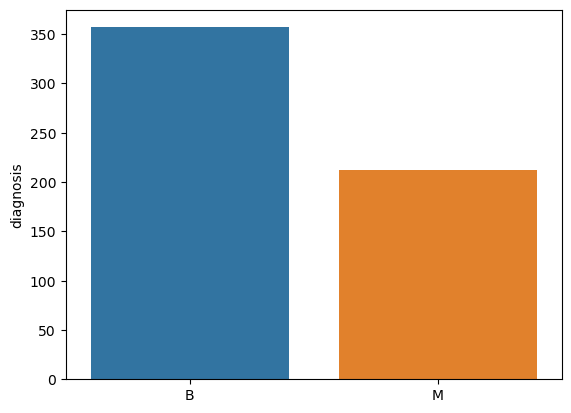

B    0.627417
M    0.372583
Name: ratio, dtype: float64


In [5]:
target = df_y.value_counts().to_frame()
target['ratio'] = target.diagnosis/target.diagnosis.sum()
sns.barplot(data=target,x=target.index,y=target.diagnosis)
plt.show()
print(target.ratio)

The dataset is mild imbalanced

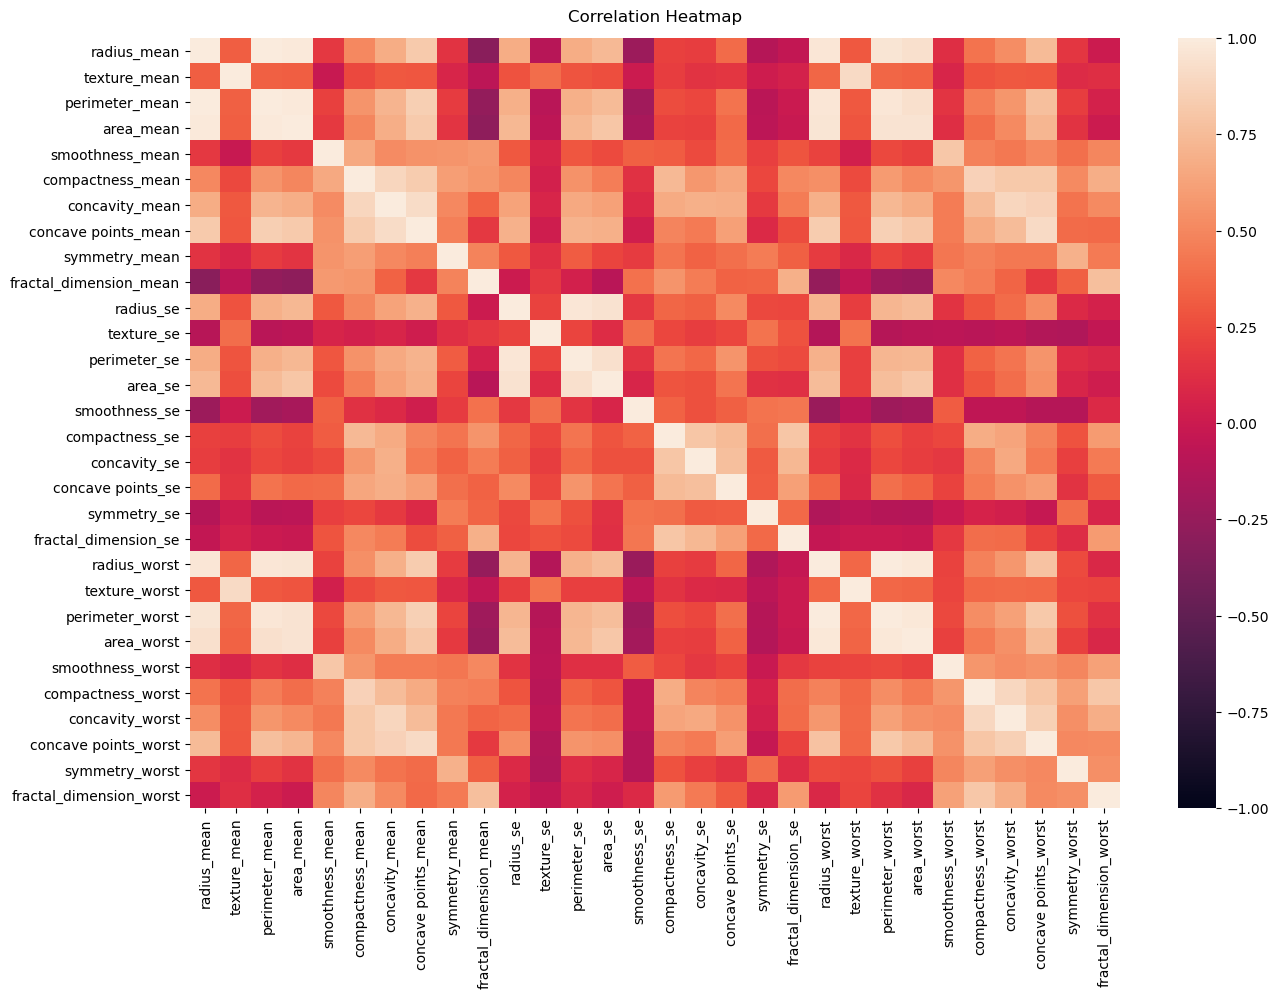

In [6]:
df_X_corr = df_X.corr()
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(data = df_X_corr,vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [7]:
corr_pair = []
for i in range(1,df_X_corr.shape[0]):
    for j in range(i+1,df_X_corr.shape[1]):
        if abs(df_X_corr.iloc[i,j]) >= 0.95:
            pair = []
            pair.append(df_X_corr.columns[i])
            pair.append(df_X_corr.columns[j])
            corr_pair.append(pair)
            
print(corr_pair)

[['perimeter_mean', 'area_mean'], ['perimeter_mean', 'radius_worst'], ['perimeter_mean', 'perimeter_worst'], ['area_mean', 'radius_worst'], ['area_mean', 'perimeter_worst'], ['area_mean', 'area_worst'], ['radius_se', 'perimeter_se'], ['radius_se', 'area_se'], ['radius_worst', 'perimeter_worst'], ['radius_worst', 'area_worst'], ['perimeter_worst', 'area_worst']]


In [8]:
feature_to_drop = ['perimeter_mean','area_mean','radius_se','radius_worst','perimeter_worst']
df_X_new = df_X.drop(columns=feature_to_drop)

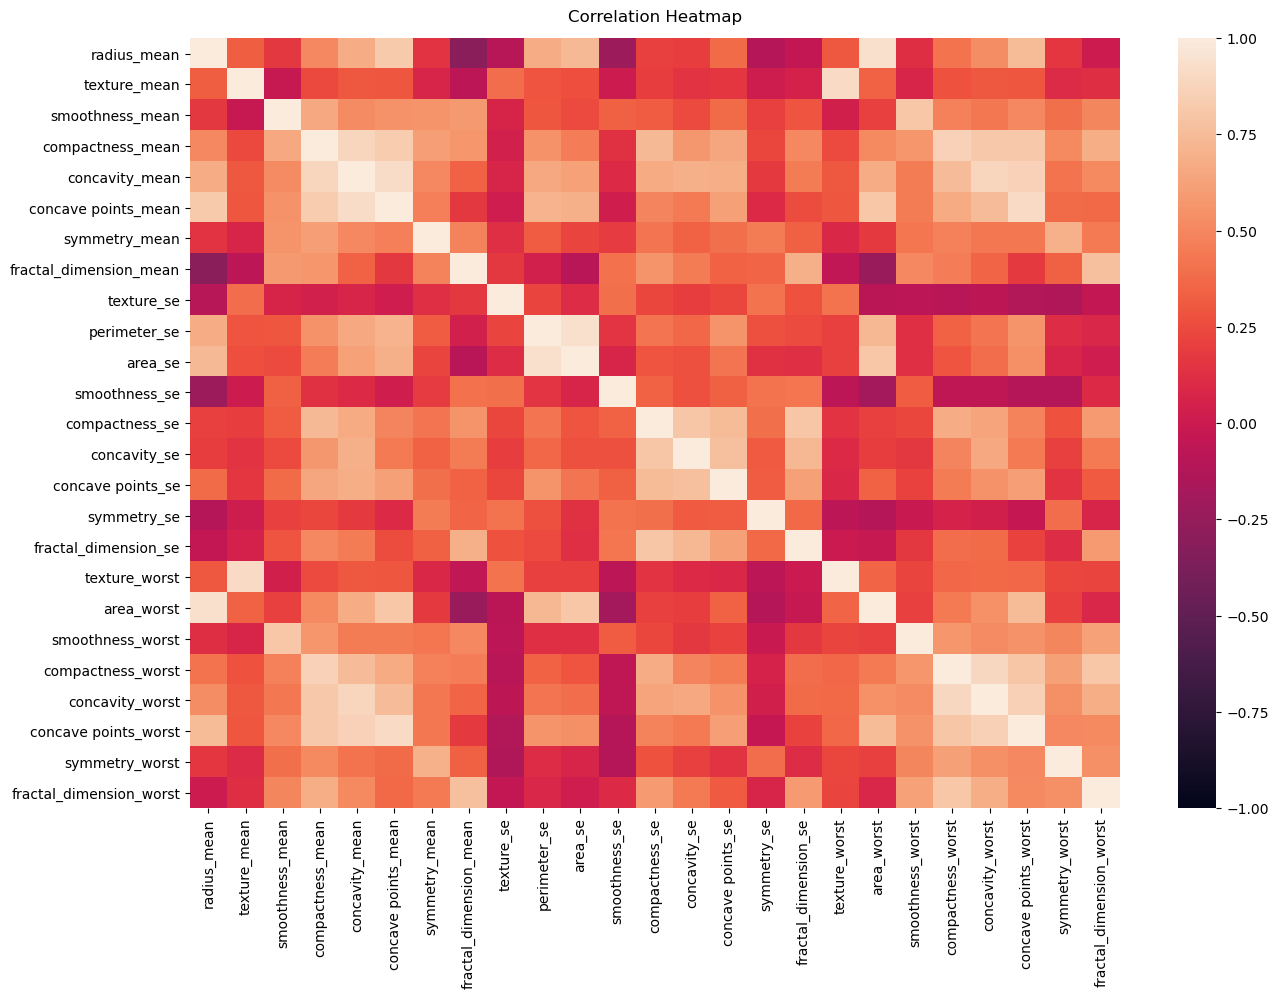

In [9]:
df_X_new_corr = df_X_new.corr()
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(data = df_X_new_corr,vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

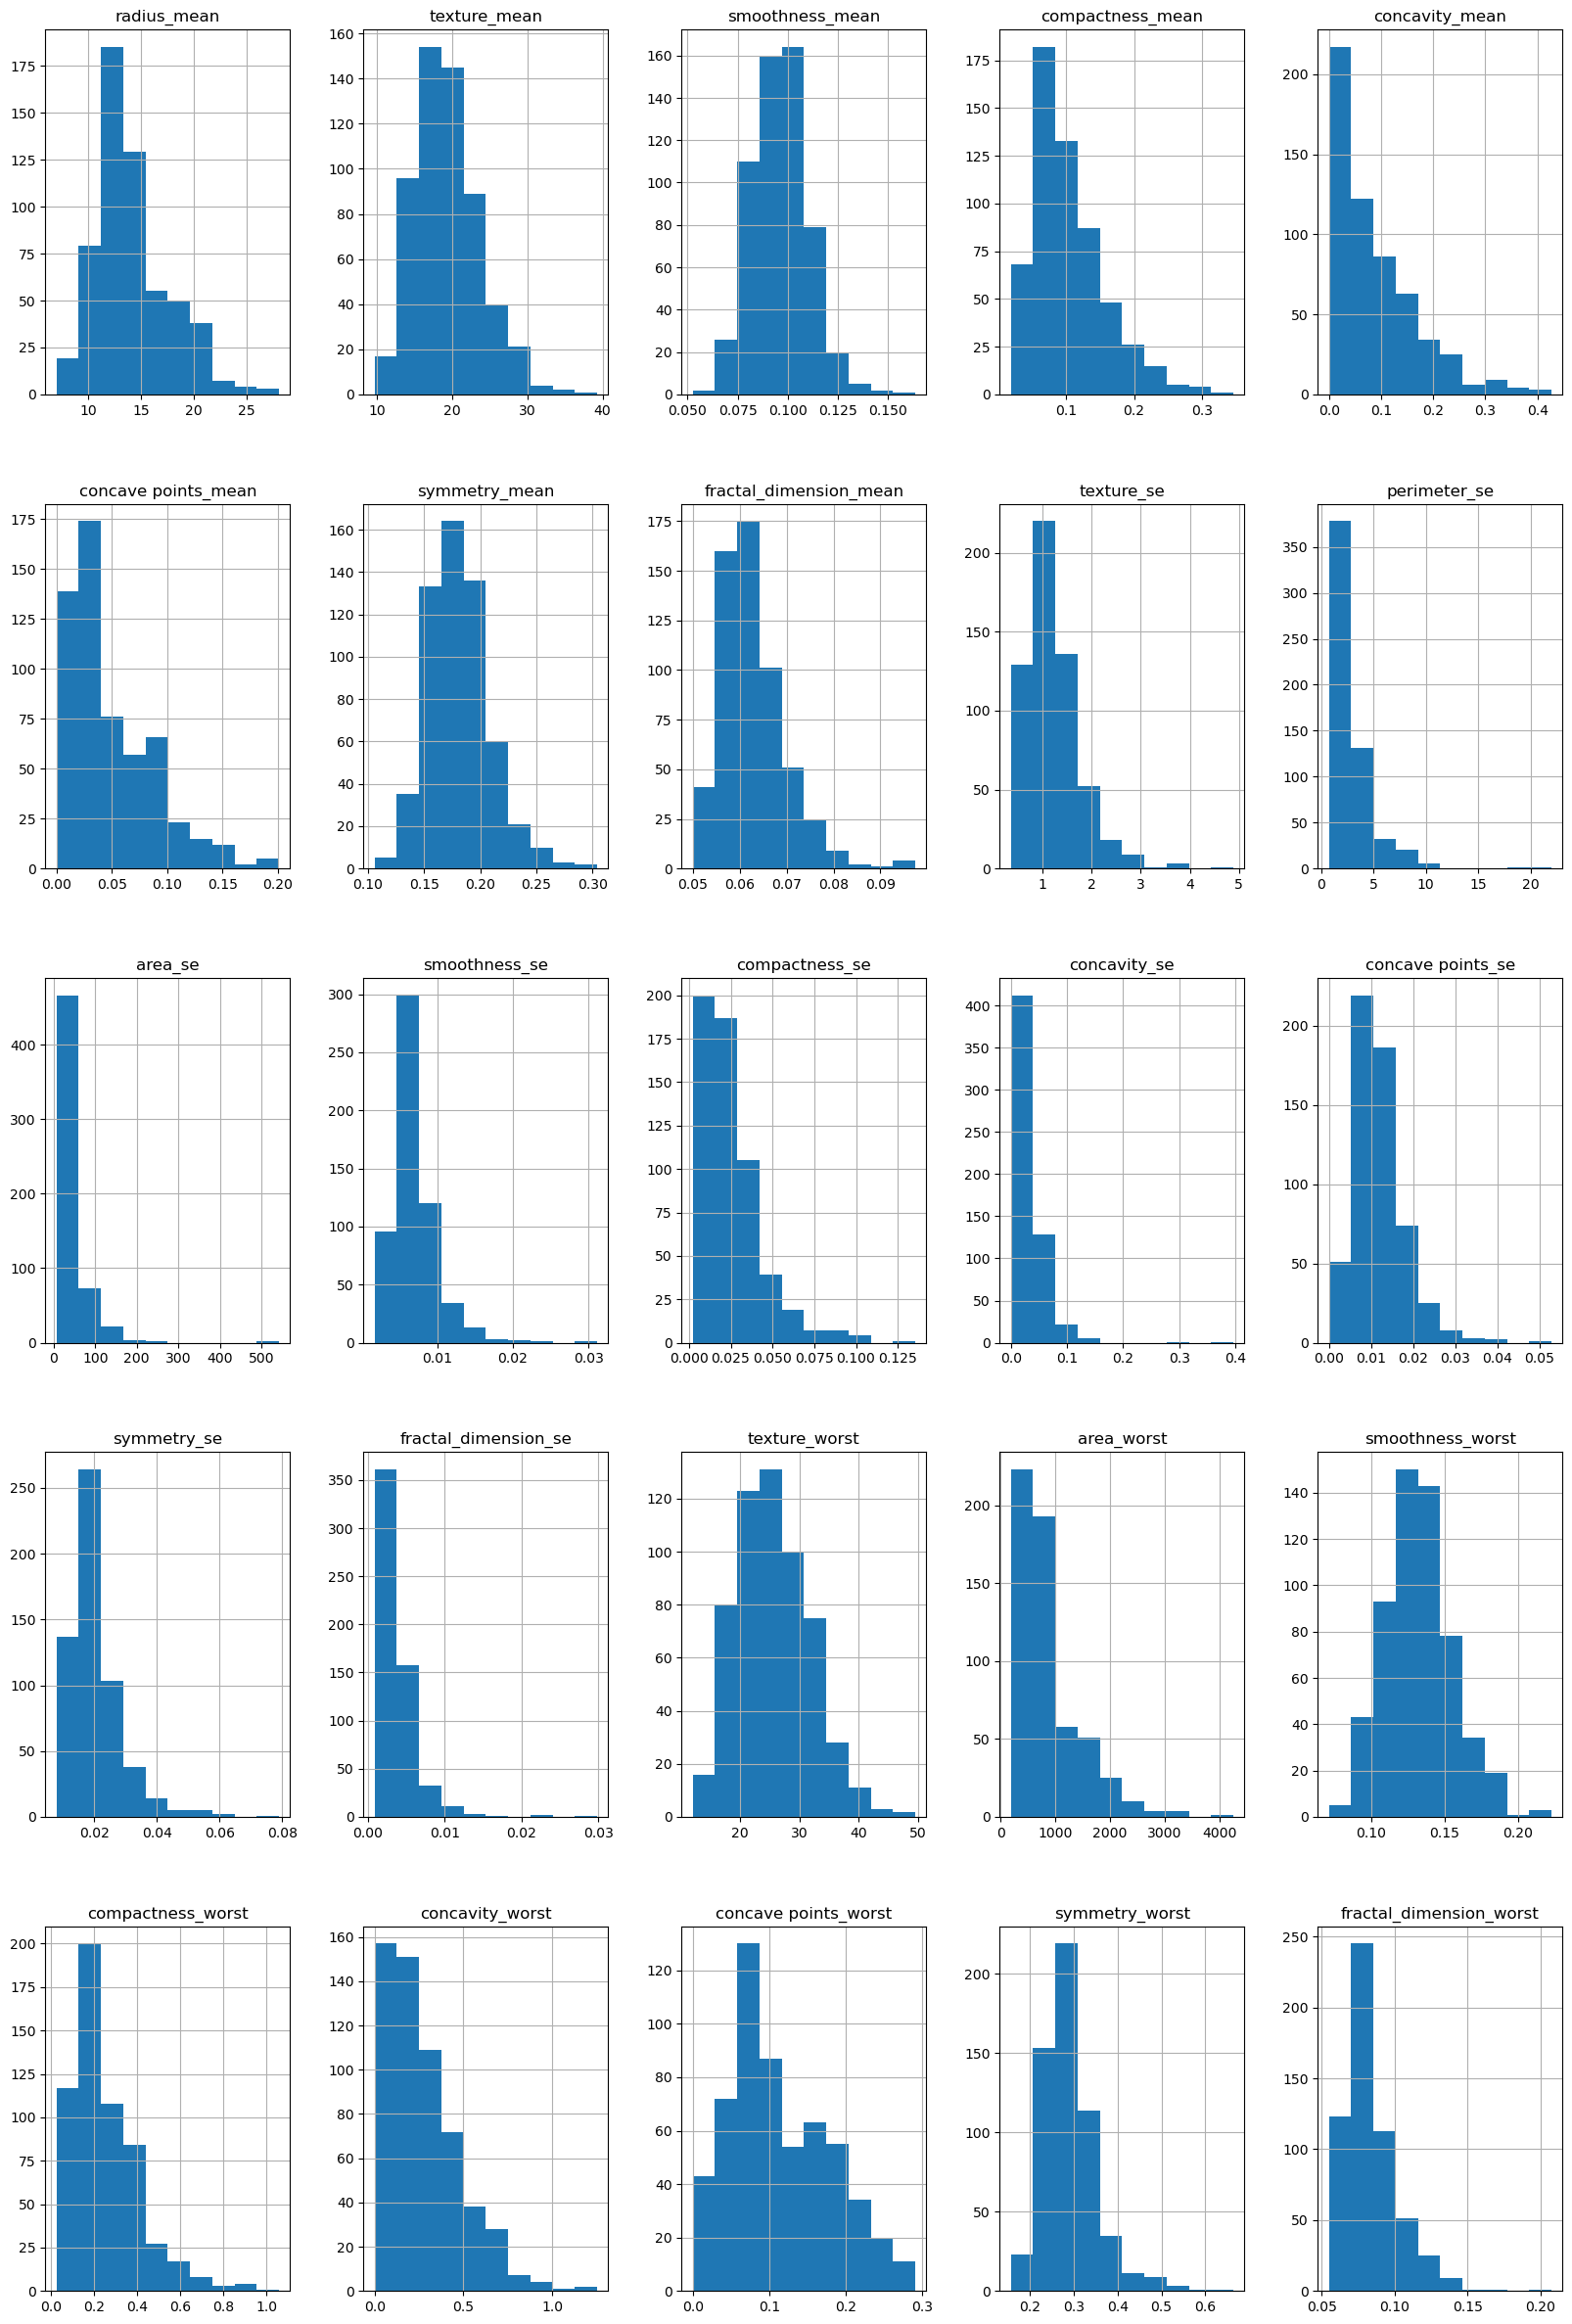

In [10]:
df_X_new.hist(figsize=(20,30))
plt.show()

In [11]:
df_y_new = df_y.replace({'M':1,'B':0})

## Here is the data set after preprocessing

In [ ]:
df_X_new
df_y_new